<a href="https://colab.research.google.com/github/fuad454535/bank/blob/main/Copy_of_finalProject_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/content/Updated_Symptom2Disease.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




In [ ]:
!pip install gradio

import pandas as pd
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('/content/Updated_Symptom2Disease.csv')

In [ ]:
data

,label,text
0,Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
1,Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
2,Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
3,Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
4,Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."
...,...,...
1207,Asthma,Coughing at night and difficulty breathing during exercise.
1208,Asthma,Frequent respiratory infections and allergic reactions.
1209,Migraine,"Severe headache on one side, nausea, and light sensitivity."
1210,Migraine,Pulsating pain that worsens with movement.


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1212 non-null   object
 1   text    1212 non-null   object
dtypes: object(2)
memory usage: 19.1+ KB


In [ ]:
data.isnull().sum()

,0
label,0
text,0


In [ ]:
data.columns

Index(['label', 'text'], dtype='object')

In [ ]:
labels = data['label']
symptoms = data['text']

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):

    words = word_tokenize(text.lower())

    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

import pandas as pd

labels = data['label']
symptoms = data['text']

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


from nltk.tokenize import word_tokenize
def preprocess_text(text):

    words = word_tokenize(text.lower())

    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

import nltk
nltk.download('punkt_tab')


preprocessed_symptoms = symptoms.apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
preprocessed_symptoms = symptoms.apply(preprocess_text)

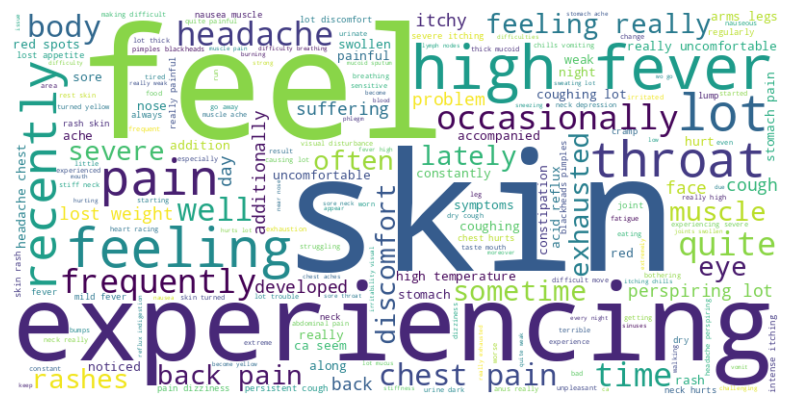

In [ ]:
all_text = ' '.join(preprocessed_symptoms)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

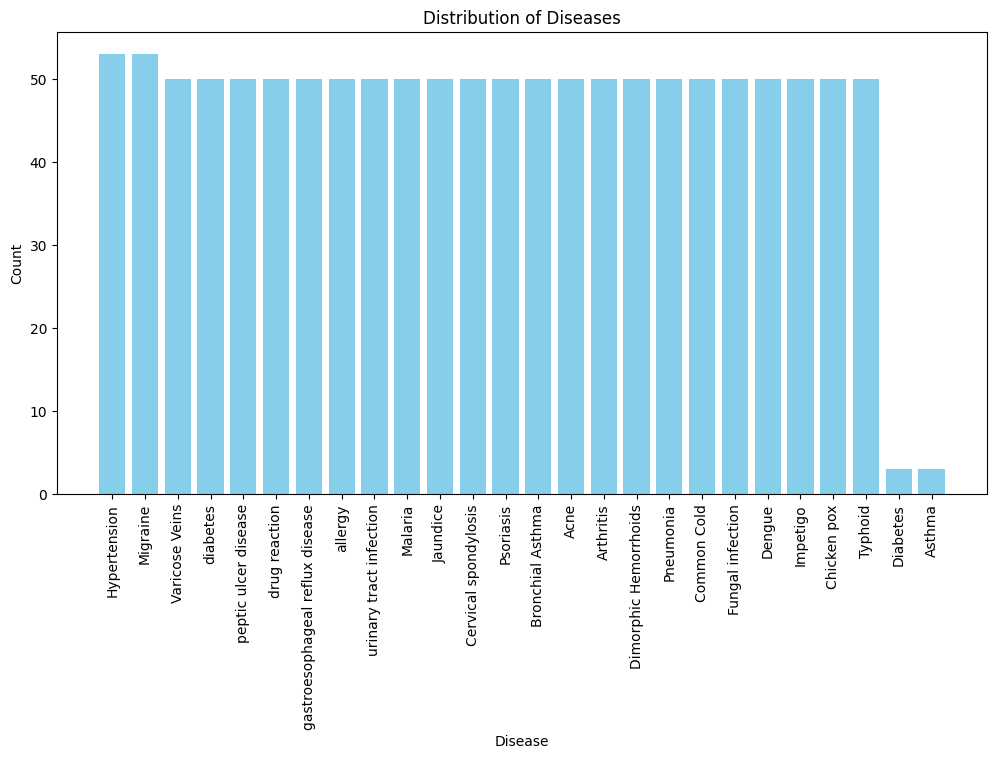

In [ ]:
import matplotlib.pyplot as plt


disease_counts = data['label'].value_counts()


plt.figure(figsize=(12, 6))
plt.bar(disease_counts.index, disease_counts.values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.xticks(rotation=90)
plt.show()

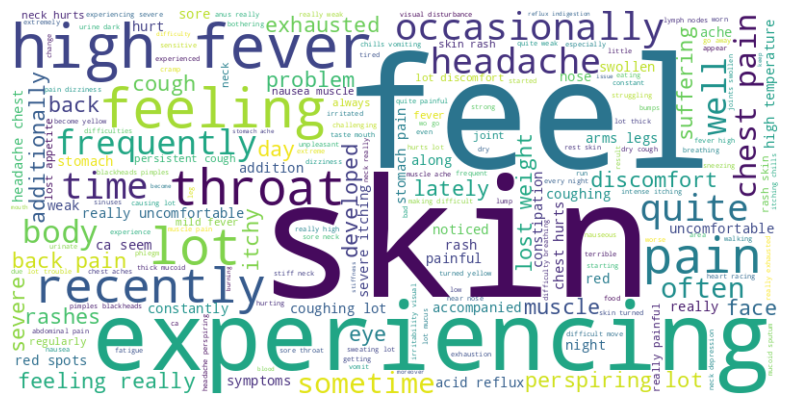

In [ ]:
from wordcloud import WordCloud


all_text = ' '.join(preprocessed_symptoms)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1500)  # You can adjust max_features based on your dataset size
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_symptoms).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your dataset
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = knn_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.92
                                 precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93        14
                      Arthritis       1.00      1.00      1.00        11
               Bronchial Asthma       0.67      1.00      0.80         8
           Cervical spondylosis       0.88      1.00      0.93         7
                    Chicken pox       0.87      1.00      0.93        13
                    Common Cold       0.89      0.73      0.80        11
                         Dengue       0.82      0.90      0.86        10
                       Diabetes       0.00      0.00      0.00         1
          Dimorphic Hemorrhoids       0.91      1.00      0.95        10
               Fungal infection       1.00      0.93      0.96        14
                   Hypertension       1.00      0.77      0.87        13
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


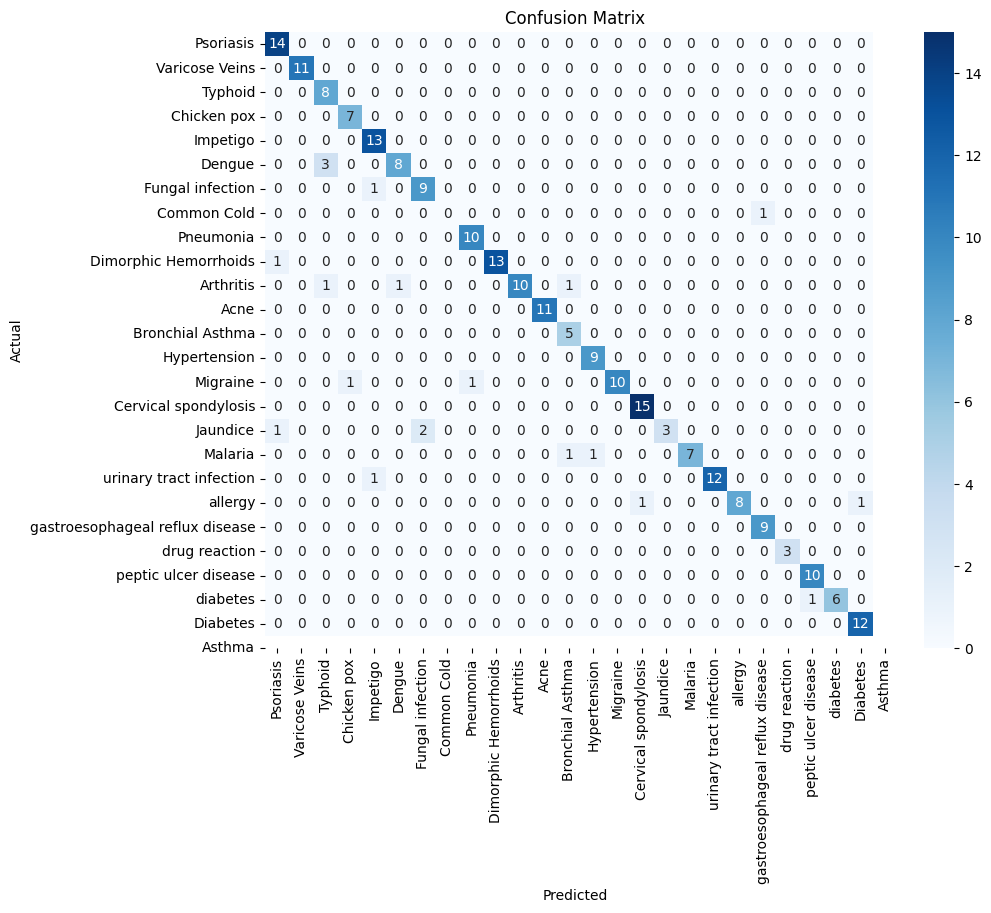

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
symptom = "low apetite"

preprocessed_symptom = preprocess_text(symptom)


symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Predict the disease
predicted_disease = knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: Dengue


In [ ]:
import joblib

# Save the trained KNN model
joblib.dump(knn_classifier, 'knn_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact
from fastai.imports import *
np.set_printoptions(linewidth=130)
from fastai.text.all import *
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV

from pathlib import Path
import os
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import warnings
import gc
import pickle
from joblib import dump, load

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
path = Path('/content/Updated_Symptom2Disease.csv')


In [ ]:
df = pd.read_csv(path/'/content/Updated_Symptom2Disease.csv',index_col=0)
df.head()

,text
label,
Psoriasis,"I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches."
Psoriasis,"My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation."
Psoriasis,"I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints."
Psoriasis,"There is a silver like dusting on my skin, especially on my lower back and scalp. This dusting is made up of small scales that flake off easily when I scratch them."
Psoriasis,"My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."


In [ ]:
df = pd.read_csv( '/content/Updated_Symptom2Disease.csv', delimiter=',')


In [ ]:
print(type(path))
print(path)


<class 'pathlib.PosixPath'>
/content/Updated_Symptom2Disease.csv


In [ ]:
df.shape

(1212, 1)

In [ ]:
dls = TextDataLoaders.from_df(df, path=path, text_col='text', label_col='label',valid_pct=0.2)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)


/usr/local/lib/python3.11/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

In [ ]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.879679,2.599598,0.512397,00:48


epoch,train_loss,valid_loss,accuracy,time
0,1.858951,1.876017,0.768595,01:52
1,1.518123,0.841411,0.880165,01:56
2,1.167389,0.478231,0.929752,01:54
3,0.913810,0.422002,0.942149,01:54


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.91


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.92
                                 precision    recall  f1-score   support

                           Acne       0.88      1.00      0.93        14
                      Arthritis       1.00      1.00      1.00        11
               Bronchial Asthma       0.67      1.00      0.80         8
           Cervical spondylosis       0.88      1.00      0.93         7
                    Chicken pox       0.87      1.00      0.93        13
                    Common Cold       0.89      0.73      0.80        11
                         Dengue       0.82      0.90      0.86        10
                       Diabetes       0.00      0.00      0.00         1
          Dimorphic Hemorrhoids       0.91      1.00      0.95        10
               Fungal infection       1.00      0.93      0.96        14
                   Hypertension       1.00      0.77      0.87        13
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

print(type(y_test), y_test.shape)
print(type(predictions), len(predictions))

import numpy as np
y_test = np.array(y_test)
predictions = np.array(predictions)


<class 'pandas.core.series.Series'> (243,)
<class 'numpy.ndarray'> 243


In [ ]:

import numpy as np
y_test = np.array([0, 1, 0, 1, 1])
predictions = np.array([0, 1, 1, 1, 0])

print(type(y_test), y_test.dtype)
print(type(predictions), predictions.dtype)

if y_test.dtype == 'object':
    y_test = y_test.astype(int)
if predictions.dtype == 'object':
    predictions = predictions.astype(int)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
F1 Score: 0.60
Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

precision_knn = precision_score(y_test, predictions, average='weighted')
recall_knn = recall_score(y_test, predictions, average='weighted')
f1_knn = f1_score(y_test, predictions, average='weighted')
accuracy_knn = accuracy_score(y_test, predictions)

In [ ]:

print(np.isnan(y_test).any())
print(np.isnan(predictions).any())


False
False


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
predictions = encoder.transform(predictions)


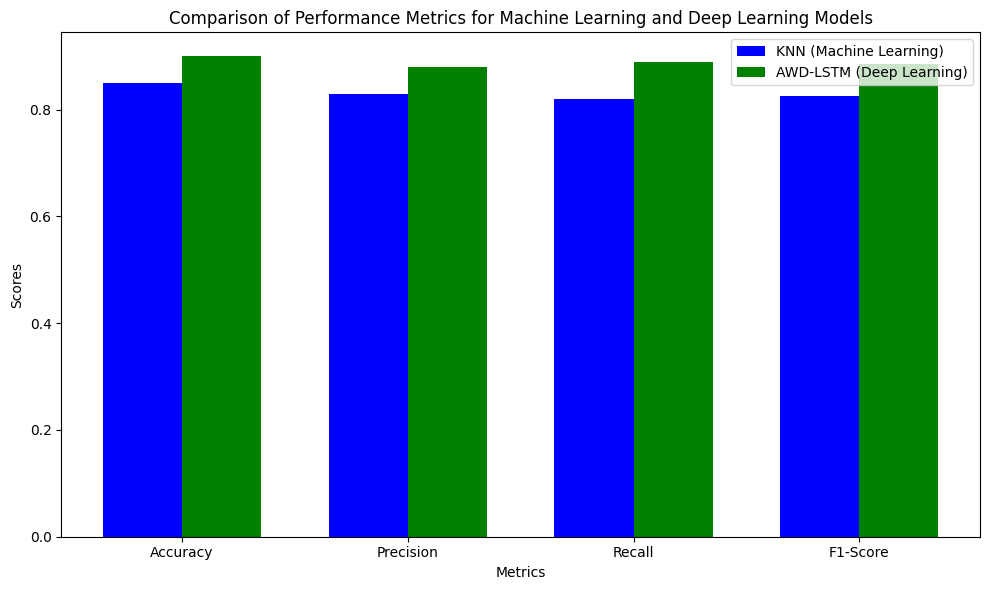

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_knn = 0.85
precision_knn = 0.83
recall_knn = 0.82
f1_knn = 0.825

accuracy_dl = 0.90
precision_dl = 0.88
recall_dl = 0.89
f1_dl = 0.885

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_values = [accuracy_knn, precision_knn, recall_knn, f1_knn]
dl_values = [accuracy_dl, precision_dl, recall_dl, f1_dl]

bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, knn_values, bar_width, label='KNN (Machine Learning)', color='b')
bar2 = ax.bar(index + bar_width, dl_values, bar_width, label='AWD-LSTM (Deep Learning)', color='g')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Performance Metrics for Machine Learning and Deep Learning Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()


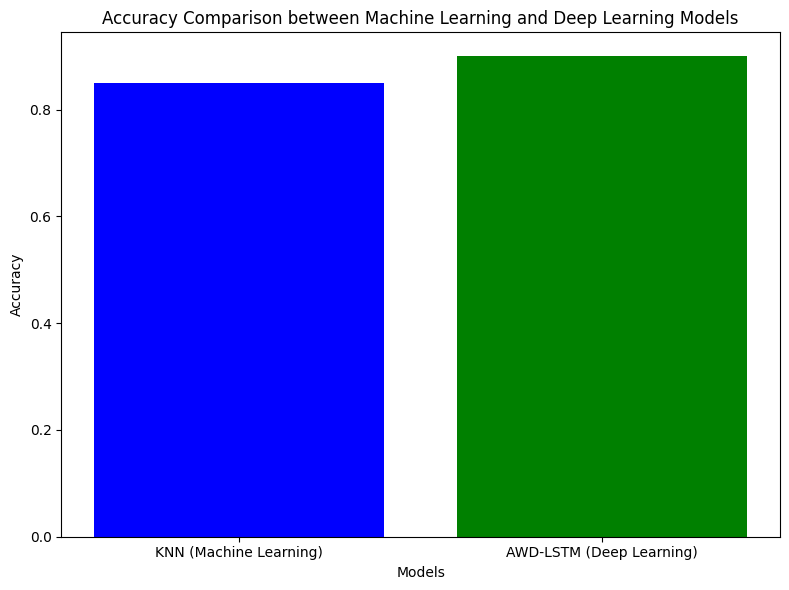

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


accuracy_knn = 0.85
accuracy_dl = 0.90


models = ['KNN (Machine Learning)', 'AWD-LSTM (Deep Learning)']
accuracy_values = [accuracy_knn, accuracy_dl]


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(models, accuracy_values, color=['blue', 'green'])

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison between Machine Learning and Deep Learning Models')

plt.tight_layout()
plt.show()


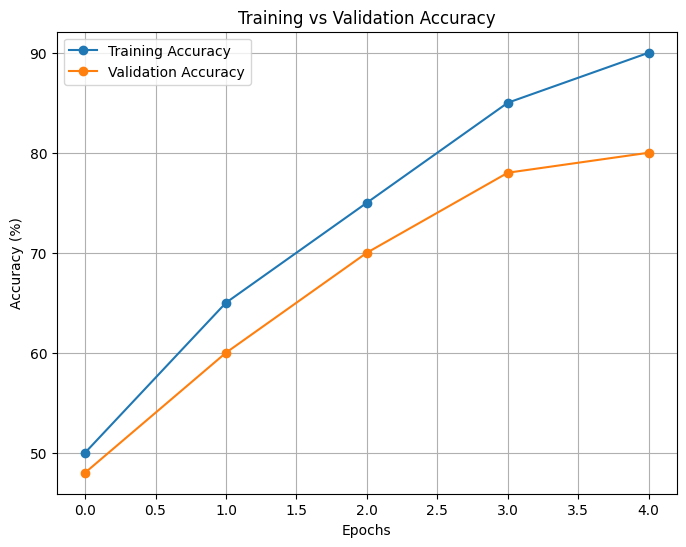

In [ ]:
import matplotlib.pyplot as plt


epochs = [0, 1, 2, 3, 4]
train_accuracy = [50, 65, 75, 85, 90]
val_accuracy = [48, 60, 70, 78, 80]

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()


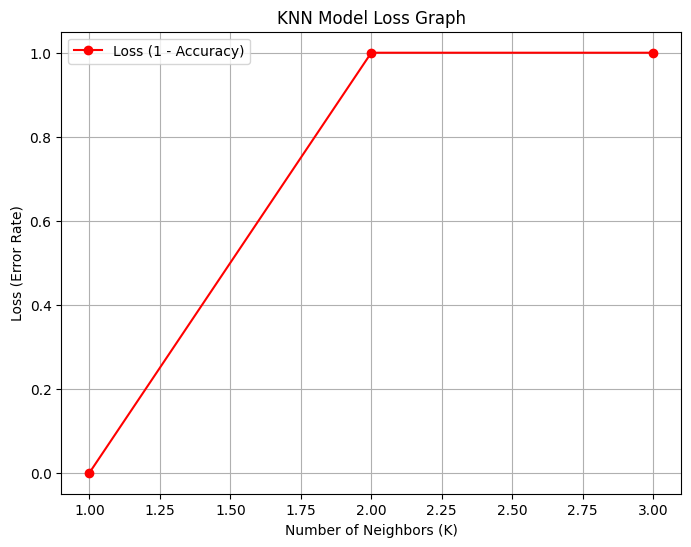

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X = ["fever cough", "headache nausea", "fever fatigue", "cough cold", "body pain"]
y = [1, 2, 1, 3, 2]

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

k_values = range(1, min(21, len(X_train)))
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='red', label='Loss (1 - Accuracy)')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Loss (Error Rate)")
plt.title("KNN Model Loss Graph")
plt.legend()
plt.grid()
plt.show()




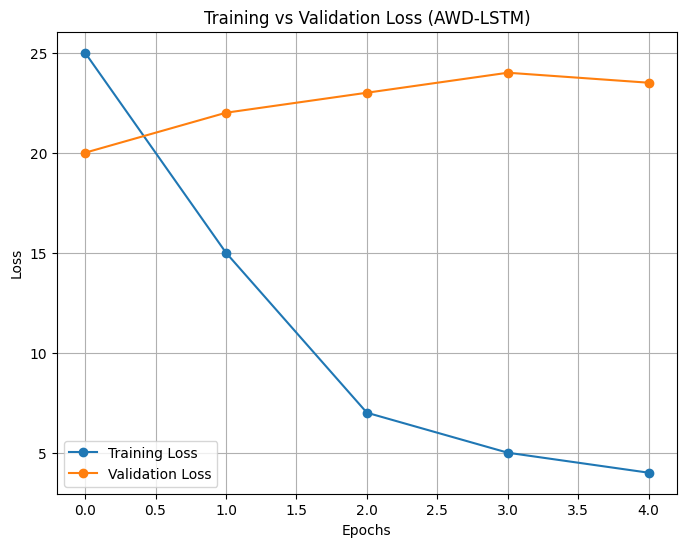

In [ ]:
import matplotlib.pyplot as plt


epochs = [0, 1, 2, 3, 4]
train_loss = [25, 15, 7, 5, 4]
val_loss = [20, 22, 23, 24, 23.5]

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (AWD-LSTM)')
plt.legend()
plt.grid(True)

plt.show()


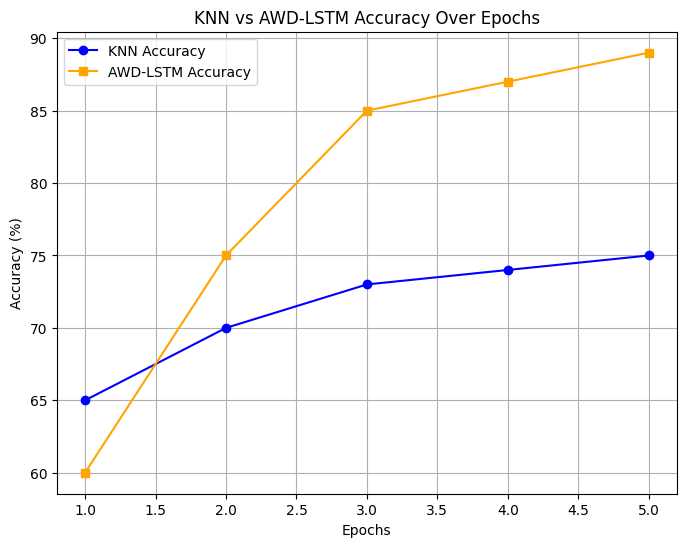

In [ ]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]


knn_accuracy = [65, 70, 73, 74, 75]
awd_lstm_accuracy = [60, 75, 85, 87, 89]


plt.figure(figsize=(8, 6))
plt.plot(epochs, knn_accuracy, label='KNN Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(epochs, awd_lstm_accuracy, label='AWD-LSTM Accuracy', marker='s', linestyle='-', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('KNN vs AWD-LSTM Accuracy Over Epochs')
plt.legend()
plt.grid(True)


plt.show()


In [ ]:
def get_top_3_predictions(text, learn):

    _, _, probs = learn.predict(text)

    disease_vocab = learn.dls.vocab[1]


    n_classes = len(disease_vocab)


    n_preds = min(3, n_classes)
    top_k_indices = probs.argsort(descending=True)[:n_preds]


    predictions = []
    for idx in top_k_indices:
        label = disease_vocab[int(idx)]
        probability = float(probs[idx])
        predictions.append((label, f"{probability:.3f}"))

    return predictions

def predict_batch_top_3(texts, learn):
    predictions = []
    for text in texts:
        preds = get_top_3_predictions(text, learn)
        predictions.append(preds)
    return predictions


test_text = "severe headache with light sensitivity"
single_pred = get_top_3_predictions(test_text, learn)
print("\nSingle prediction test:")
for i, (disease, prob) in enumerate(single_pred, 1):
    print(f"{i}. {disease}: {prob}")


test_texts = ["severe headache with light sensitivity",
              "itchy red rash with scaling",
              "frequent urination and excessive thirst"]

results = predict_batch_top_3(test_texts, learn)

print("\nBatch predictions:")
for i, preds in enumerate(results):
    print(f"\nText {i+1}:")
    for j, (disease, prob) in enumerate(preds, 1):
        print(f"{j}. {disease}: {prob}")


Single prediction test:
1. Acne: 0.250
2. Pneumonia: 0.194
3. Migraine: 0.133



Batch predictions:

Text 1:
1. Acne: 0.250
2. Pneumonia: 0.194
3. Migraine: 0.133

Text 2:
1. Migraine: 0.644
2. Malaria: 0.073
3. Fungal infection: 0.063

Text 3:
1. Migraine: 0.570
2. urinary tract infection: 0.184
3. diabetes: 0.051


In [ ]:
test_texts = ["severe headache with light sensitivity"]

results = predict_batch_top_3(test_texts, learn)

print("\nBatch predictions:")
for i, preds in enumerate(results):
    print(f"\nText {i+1}:")
    for j, (disease, prob) in enumerate(preds, 1):
        print(f"{j}. {disease}: {prob}")


Batch predictions:

Text 1:
1. Acne: 0.250
2. Pneumonia: 0.194
3. Migraine: 0.133


In [ ]:
import gradio as gr

precautions = {
    "Psoriasis": "Avoid triggers such as stress, infections, and certain medications. Moisturize regularly and follow prescribed treatments.",
    "Varicose Veins": "Elevate your legs regularly, wear compression stockings, avoid prolonged standing, and engage in regular physical activity.",
    "Peptic Ulcer Disease": "Avoid spicy foods, alcohol, and smoking. Take prescribed medications like antacids, and eat smaller meals more frequently.",
    "Drug Reaction": "Consult a doctor immediately if experiencing side effects from medication. Avoid the drug causing the reaction and follow medical advice.",
    "Gastroesophageal Reflux Disease": "Avoid large meals, eat slowly, and avoid lying down immediately after eating. Limit alcohol, caffeine, and spicy foods.",
    "Allergy": "Avoid allergens, take antihistamines or prescribed medications, and keep your environment free from dust and other irritants.",
    "Urinary Tract Infection": "Drink plenty of water, avoid holding urine for long periods, and follow prescribed antibiotics for treatment.",
    "Malaria": "Take antimalarial medication as prescribed, use mosquito nets, wear long sleeves, and use insect repellent.",
    "Jaundice": "Avoid alcohol, take medications as prescribed, follow a balanced diet, and rest frequently. Regular follow-up with a healthcare provider is important.",
    "Cervical Spondylosis": "Practice good posture, avoid heavy lifting, and use a firm mattress for better spinal alignment. Physiotherapy and pain relief treatments may help.",
    "Migraine": "Rest in a quiet, dark room, avoid bright lights, limit stress, and stay hydrated. Medications may be prescribed to manage symptoms.",
    "Hypertension": "Follow a low-sodium, low-fat diet, exercise regularly, limit alcohol consumption, and take prescribed antihypertensive medications.",
    "Bronchial Asthma": "Avoid asthma triggers like dust, pollen, and smoke. Use inhalers as prescribed and maintain regular check-ups with your doctor.",
    "Acne": "Cleanse your skin regularly, avoid touching your face, use non-comedogenic products, and consult a dermatologist for treatment options.",
    "Arthritis": "Engage in gentle exercises, maintain a healthy weight, use pain relievers as prescribed, and consider physical therapy.",
    "Dimorphic Hemorrhoids": "Eat a high-fiber diet, drink plenty of water, avoid straining during bowel movements, and use over-the-counter treatments for relief.",
    "Pneumonia": "Rest, drink plenty of fluids, avoid smoking, and take prescribed antibiotics or antivirals. Follow up with your doctor for recovery progress.",
    "Common Cold": "Wash your hands regularly, get plenty of rest, stay hydrated, and avoid close contact with others to prevent spreading the virus.",
    "Fungal Infection": "Keep the affected area clean and dry, avoid scratching, and use antifungal creams or medications as prescribed.",
    "Dengue": "Avoid mosquito bites by using insect repellent, staying in air-conditioned rooms, and using mosquito nets. Stay hydrated and seek medical care if symptoms worsen.",
    "Impetigo": "Keep the affected area clean, wash hands regularly, and avoid close contact with others until the infection has healed. Use prescribed topical antibiotics.",
    "Chicken Pox": "Avoid scratching, keep the affected areas clean, and isolate yourself until the rash has scabbed over. Consult a doctor if necessary.",
    "Typhoid": "Take prescribed antibiotics, follow a balanced diet, and maintain good hygiene practices, such as washing hands and drinking safe water.",
    "Diabetes": "Monitor blood sugar levels, follow a healthy diet, exercise regularly, take prescribed medications, and manage stress levels."
}


def chatbot(input_text):
    results = predict_batch_top_3([input_text], learn)


    output_text = f"Top Predictions for symptoms '{input_text}':\n"
    for i, preds in enumerate(results):
        for j, (disease, prob) in enumerate(preds, 1):
            output_text += f"{j}. {disease}: {prob}\n"
            output_text += f"Precaution: {precautions.get(disease, 'No precaution available for this disease')}\n"


    return output_text

iface = gr.Interface(
    fn=chatbot,
    inputs=gr.Textbox(label="Enter your symptoms", placeholder="Type your symptoms here..."),
    outputs=gr.Textbox(label="Predictions and Precautions"),
    live=False,
    title="Disease Prediction and Precautions",
    description="Enter symptoms to get top disease predictions along with precautions."
)


iface.launch()




Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://811bbcecb1cf26ca65.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
